<a href="https://colab.research.google.com/github/aymen0627/ML_Topics/blob/main/Group_8_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aymen Hasnain & Thomas Kipping
#Problem1

#In this problem, use a linear binary classifier (no activation function) with weight matrix W of size M × F 
#Choose F = 5 and M = 2 
#Generate N = 1000 training data points (each of size F) by using Gaussian PDF with mean of 0 (0.1) and variance of 1 (1) for 
              #labels belonging to class 0 (1).
#errror function  = 0.5(y1(xn)−tn1)^2+0.5(y2(xn)−tn2)^2
#k = {1,2}

#Choose the learning rate (step size) η = 0.00005 and train for 50 iterations

#nitialize the weight matrix W from a uniform PDF with bounds of [−1,1].

In [ ]:

import numpy as np
np.random.seed(seed=0) #can change seed I guess
# dataset with M=2 and F = 5
number_of_classes_M = 2
number_of_features_F = 5
number_of_points_N   = 1000
data = []
for index in range(number_of_points_N):
    random_choice_for_mean = np.random.choice([0,1])
    tru_lbl = random_choice_for_mean
  # tn = (0,1)⊤ for class 0 and tn = (1,0) for class 1
    if tru_lbl == 0:
        one_hot_rep = [0,1]
        mean = 0
    if tru_lbl == 1:
        one_hot_rep = [1,0]
        mean = 0.1

    mean = random_choice_for_mean

    data.append((np.random.normal(loc=mean, scale=1, size=(number_of_features_F)), one_hot_rep))

In [ ]:
#bounds made -1,1
weights = np.random.uniform(low=-1, high=1, size=(number_of_classes_M, number_of_features_F))

In [ ]:
############ Obtain the error function w.r.t. all data points.
def errof_wrt_all_datapoints(data, weights):

    error_fun_wrt_weights_per_point = []

    for data_point_index in range(number_of_points_N):

        NW_output = np.matmul(weights, data[data_point_index][0])

        error =0.5*np.sum((NW_output - data[data_point_index][1])**2)

        error_fun_wrt_weights_per_point.append(error)

        #print(error)

    error_fun_wrt_weights_all_datapoints = sum(error_fun_wrt_weights_per_point)
    return error_fun_wrt_weights_all_datapoints

In [ ]:
def gradient_matrix(data, weights):

    grad_all = np.zeros(shape=(number_of_classes_M, number_of_features_F, number_of_points_N))

    for data_point_index in range(number_of_points_N):
        NW_output = np.matmul(weights, data[data_point_index][0])
        tru_output = data[data_point_index][1]
        training_vec = data[data_point_index][0]
        for feature_index in range(number_of_features_F):
            for class_index in range(number_of_classes_M):
                #sum_temp.append((NW_output[class_index] - tru_output[class_index])*training_vec[feature_index])

                grad_all[class_index, feature_index, data_point_index] = (NW_output[class_index] - tru_output[class_index])*training_vec[feature_index]
                #grad_all[class_index, feature_index, data_point_index] = (NW_output[class_index] - tru_output[class_index])


    grad_matrix = np.zeros(shape=(number_of_classes_M, number_of_features_F))

    for feature_index in range(number_of_features_F):
        for class_index in range(number_of_classes_M):
            grad_matrix[class_index, feature_index] = np.sum(grad_all[class_index, feature_index, :])

    return grad_matrix

In [ ]:
######## gradient descent loop:
number_of_iterations = 50
step_size_eta = 0.00005

CA_save = []
MSE_save = []

for iter in range(number_of_iterations):

    grad_mat = gradient_matrix(data, weights)

    weights = weights - (step_size_eta * grad_mat)

    MSE_err = errof_wrt_all_datapoints(data, weights)

    # get the training classification accuracy
    ca_cnt = 0
    for data_point_index in range(number_of_points_N):
        NW_output = np.matmul(weights, data[data_point_index][0])
        pred_class = np.argmax(NW_output)
        tru_class = np.argmax(data[data_point_index][1])
        if pred_class == tru_class:
            ca_cnt = ca_cnt + 1

    print("iteration {} - MSE = {} - training CA {}".format(iter, MSE_err, 100*ca_cnt/number_of_points_N))

    CA_save.append(100*ca_cnt/number_of_points_N)
    MSE_save.append(MSE_err)
    

iteration 0 - MSE = 3368.6539706846256 - training CA 37.0
iteration 1 - MSE = 2866.5323367430306 - training CA 39.8
iteration 2 - MSE = 2479.2652511687666 - training CA 43.6
iteration 3 - MSE = 2174.3655612659168 - training CA 45.1
iteration 4 - MSE = 1929.3968964671274 - training CA 47.2
iteration 5 - MSE = 1728.7673338223456 - training CA 48.8
iteration 6 - MSE = 1561.5559053981308 - training CA 51.2
iteration 7 - MSE = 1420.0382436332104 - training CA 52.6
iteration 8 - MSE = 1298.6855774340975 - training CA 54.3
iteration 9 - MSE = 1193.484299401459 - training CA 55.4
iteration 10 - MSE = 1101.4727165137424 - training CA 56.3
iteration 11 - MSE = 1020.4250126716892 - training CA 57.0
iteration 12 - MSE = 948.6350599242384 - training CA 57.6
iteration 13 - MSE = 884.7680121583841 - training CA 58.4
iteration 14 - MSE = 827.7579656768477 - training CA 60.0
iteration 15 - MSE = 776.7369753970855 - training CA 60.6
iteration 16 - MSE = 730.9854557648401 - training CA 61.2
iteration 17 

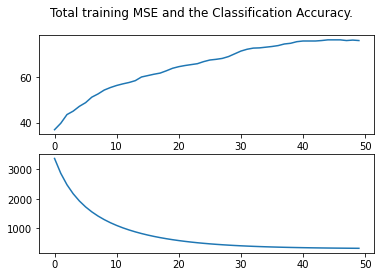

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# define the axes
x_axis = list(range(number_of_iterations))
y_axis_CA = CA_save
y_axis_MSE = MSE_save

fig, axs = plt.subplots(2)
fig.suptitle('Total training MSE and the Classification Accuracy.')
axs[0].plot(x_axis, y_axis_CA)
axs[1].plot(x_axis, y_axis_MSE)
